# Point in Polygon

Find if the point is in polygon

## Description

To check if the point is in polygon we cast a ray in any direction and check how many times it croses the polygon edges, if `n % 2 = 0` (even) then point is _outside_ otherwise it's inside

## First step
We want to think of a polygon in terms of edges

First we need to check if the point `(xp, yp)` is within the y of the edge (edge being `[(x1, y1), (x2, y2)]`) (white area)

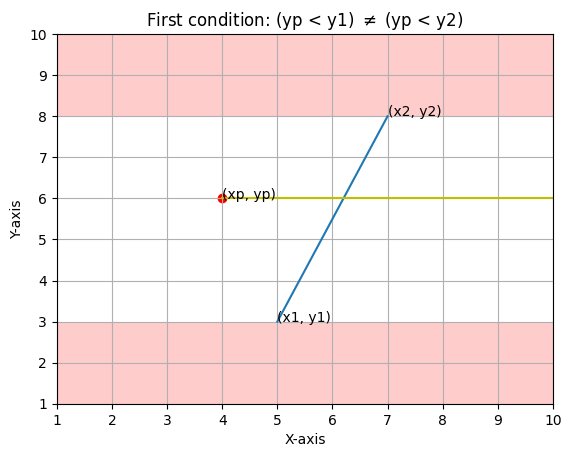

In [3]:
import matplotlib.pyplot as plt

# Edge
x = [5, 7]
y = [3, 8]

plt.annotate("(x1, y1)", (x[0], y[0]))
plt.annotate("(x2, y2)", (x[1], y[1]))
plt.plot(x, y)

plt.annotate("(xp, yp)", (4, 6))
plt.scatter(*(4, 6), c="r")

plt.plot([4, 10], [6, 6], c="y")

plt.axhspan(3, 0, facecolor="r", alpha=0.2)
plt.axhspan(8, 10, facecolor="r", alpha=0.2)

# Config
plt.title(r"First condition: (yp < y1) $\neq$ (yp < y2)")
plt.grid()
plt.xlim(1, 10)
plt.ylim(1, 10)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

## Second Step
Now we need to make sure `x` axis crosses the edge
We can instantly assume that if `xp < x1` it definitely crosses (green area) and if `xp > x2` it doesn't cross (red area)

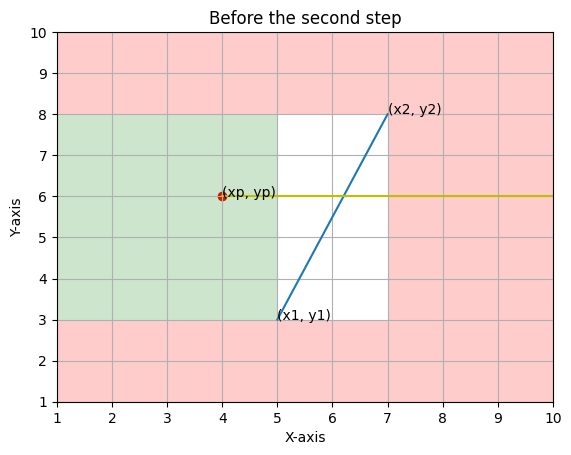

In [5]:
import matplotlib.pyplot as plt

# Edge
x = [5, 7]
y = [3, 8]

plt.annotate("(x1, y1)", (x[0], y[0]))
plt.annotate("(x2, y2)", (x[1], y[1]))
plt.plot(x, y)

plt.annotate("(xp, yp)", (4, 6))
plt.scatter(*(4, 6), c="r")

plt.plot([4, 10], [6, 6], c="y")

# Red area
plt.axhspan(0, 3, facecolor="r", alpha=0.2)
plt.axhspan(8, 10, facecolor="r", alpha=0.2)

# Green area + Extra red area
g_rect = plt.Rectangle((0,3), 5, 5, facecolor="g", alpha=0.2)
r_rect = plt.Rectangle((7,3), 5, 5, facecolor="r", alpha=0.2)
ax = plt.gca()
ax.add_patch(g_rect)
ax.add_patch(r_rect)


# Config
plt.title("Before the second step")
plt.grid()
plt.xlim(1, 10)
plt.ylim(1, 10)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


Our main idea during the last step is to find whether $x_p$ crosses the edge.  
For that we will use $x_1$ as an offset and then using _parametric form of a line segment_ equation  
We can first estimate the ratio between $y_p-y_1$ and $y_2-y_1$ to know how far on the $y$ axis intersection point lies, and then because we know that $x$ is directly correlated to $y$ along the slope, we can use this relation to multiply to $x_2-x_1$ and find where the edge starts in terms of $x$ axis

All that is needed to finally find if the point intersects the edge on the $x$ axis using the following equation:
$$
x_p < x_1 + \dfrac{y_p - y_1}{y_2 - y_1} * (x_2 - x_1)
$$
>Note: in this equation right part of $<$ is the formula for $x_0$

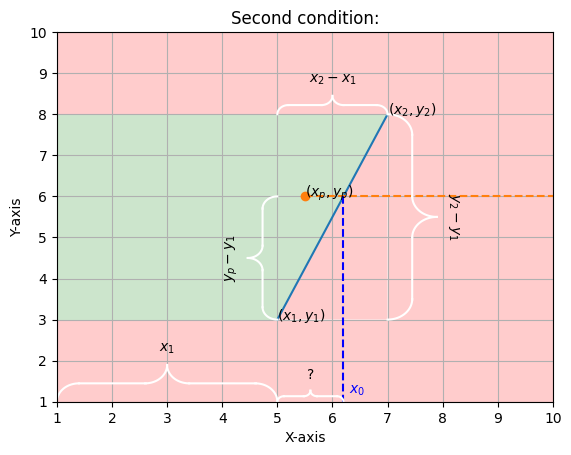

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle 
from curlyBrace import curlyBrace as cb

# Edge
x = [5, 7]
y = [3, 8]

plt.annotate("$(x_1, y_1)$", (x[0], y[0]))
plt.annotate("$(x_2, y_2)$", (x[1], y[1]))
plt.plot(x, y)

# Ray cast
plt.annotate("$(x_p, y_p)$", (5.5, 6))
plt.plot([5.5, 11], [6, 6], "o--")

# Unknown plot
plt.annotate("$x_0$", (6.3, 1.2), c="b")
plt.plot([6.2, 6.2], [6, 1], "b--")

# Red area
plt.axhspan(0, 3, facecolor="r", alpha=0.2)
plt.axhspan(8, 10, facecolor="r", alpha=0.2)

# Additional areas
patches = [
    Rectangle((0, 3), 5, 5, facecolor="g", alpha=0.2),
    Rectangle((7, 3), 5, 5, facecolor="r", alpha=0.2),
    Polygon([(5, 3), (5, 8), (7, 8)], facecolor="g", alpha=0.2),
    Polygon([(5, 3), (7, 8), (7, 3)], facecolor="r", alpha=0.2)
]
ax = plt.gca()

for patch in patches:
    ax.add_patch(patch)

# Curly braces
fig = plt.gcf()

# cb(fig, ax, p2, p1, k_r1, bool_auto=True, str_text=str_text, color='r', lw=2, int_line_num=1, fontdict=font)
cb(fig, ax, [5, 8], [7, 8], str_text="$x_2 - x_1$", color="white")
cb(fig, ax, [1, 1], [5, 1], str_text="$x_1$", color="white")
cb(fig, ax, [5, 1], [6.2, 1], str_text="?", color="white")

cb(fig, ax, [7, 8], [7, 3], str_text="$y_2 - y_1$", color="white")
cb(fig, ax, [5, 3], [5, 6], str_text="$y_p - y_1$", color="white")

# Config
plt.title("Second condition:")
plt.grid()
plt.xlim(1, 10)
plt.ylim(1, 10)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


### Extra

Here's the extra info on line segment equation, it's helpful to understand the relation between the points along the line.

Given two endpoints
$(x_1, y_1)$ and $(x_2, y_2)$  
any point on the line between them can be written as:
$$
(x(t), y(t)) = (x_1 + t(x_2 - x_1), y_1 + t(y_2 - y_1)), t \in [0, 1]
$$

Here $t$ is the parameter:  
- $t = 0$ -> $point = (x_1, y_1)$
- $t = 1$ -> $point = (x_2, y_2)$

So in our example $t$ is $\dfrac{y_p - y_1}{y_2 - y_1}$